In [98]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [99]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [100]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [101]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [102]:
# scaler to better format
scaler = StandardScaler()

In [103]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
normalized_data = scaler.fit_transform(df_market_data)

In [104]:
# Create a DataFrame with the scaled data
# oneliner, 
scaled_market_data = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)

In [105]:
# Display sample data

scaled_market_data.tail(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
ethereum-classic,-0.071312,-0.229484,-0.175544,0.051882,-0.551760,-0.526060,-0.273062
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625
maker,-0.125168,0.580730,-0.202356,0.582911,-0.395923,-0.358240,-0.273433
havven,-1.428574,-0.025510,-1.628859,-0.860354,-0.840714,0.898815,0.268647
omisego,1.919812,0.370447,-1.619761,-0.409716,1.696480,0.811207,-0.021888
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488
ontology,-0.409044,-0.906963,-1.298986,-1.393153,-0.696937,-0.422835,-0.292344
ftx-token,0.414711,0.414044,-0.047386,-0.465380,0.128185,-0.416502,-0.145469
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747


---

### Find the Best Value for k Using the Original Data.

In [106]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,11))


In [107]:
# Create an empty list to store the inertia values
list_of_inertias = []
list_of_ks = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(scaled_market_data)
    list_of_inertias.append(kmeans.inertia_)
    list_of_ks.append(k)

c:\Users\Sezy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sezy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sezy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sezy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

Elbow Plot

<Axes: >

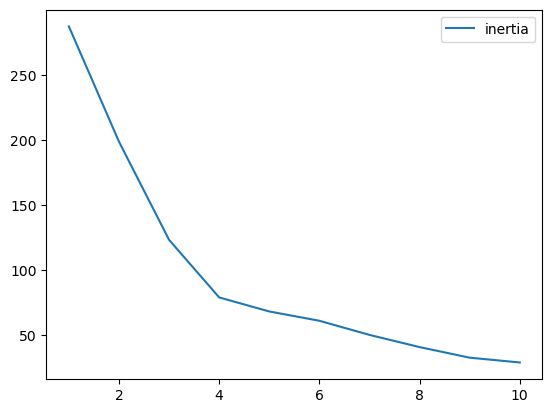

In [109]:
# Create a dictionary with the data to plot the Elbow curve
df_of_ks = pd.DataFrame(
    {'inertia': list_of_inertias},
    index=list_of_ks)

# Create a DataFrame with the data to plot the Elbow curve
df_of_ks.plot()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Probably 4


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [67]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")

In [68]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_market_data)

c:\Users\Sezy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=0)

In [69]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_array = kmeans.predict(scaled_market_data)

# Print the resulting array of cluster values.
print(cluster_array)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [70]:
# Create a copy of the DataFrame
scaled_market_data_copy = scaled_market_data.copy()

In [71]:
# Add a new column to the DataFrame with the predicted clusters
scaled_market_data_copy["Cluster_Data"] = cluster_array

# Display sample data
scaled_market_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster_Data
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [72]:
scaled_market_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster_Data
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [73]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = scaled_market_data_copy.hvplot.scatter(
    x= 'price_change_percentage_24h',
    y= "price_change_percentage_7d",
    c= 'Cluster_Data',
    hover_cols= ['coin_id']

)
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster_Data,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [74]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [75]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_components = pca.fit_transform(scaled_market_data_copy)
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2', 'PCA3'])
# View the first five rows of the DataFrame. 
pca_df.head()

,PCA1,PCA2,PCA3
0,2.034093,-0.641571,-0.357629
1,1.994502,-0.490549,-0.912250
2,-1.068544,-0.417205,0.596311
3,-1.040919,-0.455234,0.467801
4,3.302764,-1.242458,-0.217276


In [76]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
variance_total = pca.explained_variance_ratio_
print(variance_total)
sum(variance_total)

[0.36941241 0.29169375 0.22893878]


0.890044939868115

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** .89004 or 89% 


I think i did this out of order a little bit but I think its still correct

In [77]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
pca_df.index = df_market_data.index

# Set the coinid column as index


# Display sample data
pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,2.034093,-0.641571,-0.357629
ethereum,1.994502,-0.490549,-0.912250
tether,-1.068544,-0.417205,0.596311
ripple,-1.040919,-0.455234,0.467801
bitcoin-cash,3.302764,-1.242458,-0.217276


---

### Find the Best Value for k Using the PCA Data

In [78]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [79]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)

print(inertia_values)

c:\Users\Sezy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sezy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sezy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sezy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

[325.73473957856254, 201.28762245654406, 111.73680938677688, 40.19728442405935, 29.94590949973292, 20.988916219540823, 15.454247198555883, 12.125400369163716, 9.573032652919261, 7.938234563924159, 6.8191528994261175]


In [80]:
# Create a dictionary with the data to plot the Elbow curve
elbow_info = {
    'k':k_values,
    'inertia': inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_info)
elbow_df.head()

,k,inertia
0,1,325.734740
1,2,201.287622
2,3,111.736809
3,4,40.197284
4,5,29.945909


<Axes: >

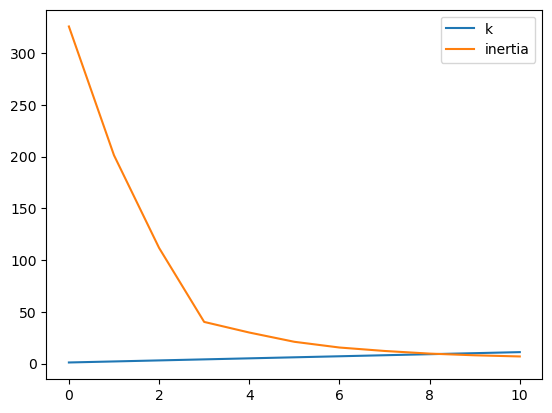

In [81]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  yes it does. The original data was 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [82]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

In [83]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

c:\Users\Sezy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [84]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans.predict(pca_df)
# Print the resulting array of cluster values.
print(predicted_clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 1
 0 0 0 0]


In [85]:
# Create a copy of the DataFrame with the PCA data
pca_df_with_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_with_clusters['Cluster'] = predicted_clusters

# Display sample data
pca_df_with_clusters.head()

,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,2.034093,-0.641571,-0.357629,1
ethereum,1.994502,-0.490549,-0.912250,1
tether,-1.068544,-0.417205,0.596311,0
ripple,-1.040919,-0.455234,0.467801,0
bitcoin-cash,3.302764,-1.242458,-0.217276,1


In [86]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_PCA = pca_df_with_clusters.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='Cluster',
    hover_cols=['coin_id'],
    title='Crypto Clusters')
scatter_plot_PCA

:Scatter   [PCA1]   (PCA2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

TypeError: unsupported operand type(s) for +: 'Axes' and 'Axes'

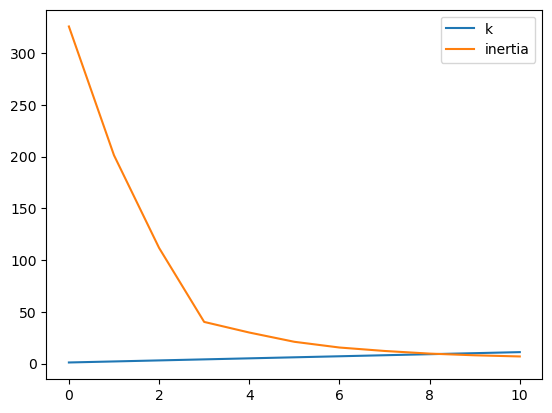

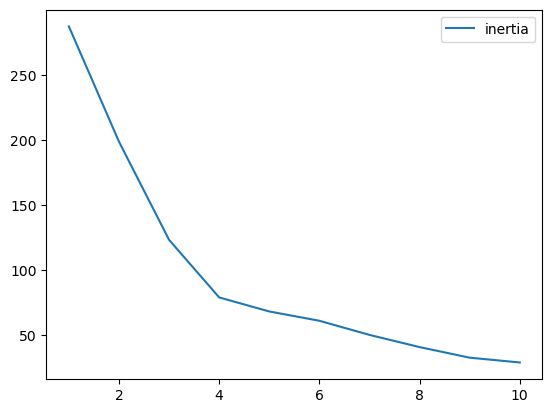

In [113]:
# Composite plot to contrast the Elbow curves
# elbow_df.plot()+df_of_ks.plot()
elbow_df.plot()+df_of_ks.plot()
# i know this is slightly wrong. I think its because i didnt use hvplot


In [114]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
scatter_plot_PCA+scatter_plot

:Layout
   .Scatter.I  :Scatter   [PCA1]   (PCA2,Cluster,coin_id)
   .Scatter.II :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster_Data,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features gave us more distinct clusters.